# Ch 11 The Dynamics of Derivative Prices

In [1]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

## 4 Major Models of SDEs

### 4.1 Linear Constant Coefficient SDEs

$$
    dS_t = \mu dt + \sigma dW_t, \qquad t \in [0, \infty)
$$

A discrete approximation is given:
$$
    S_k = S_{k - 1} + .01(.001) + .03(\Delta W_k), \qquad k = 1, 2, \ldots, 1000.
$$
with the initial point $S_0 = 100$.

In [2]:
mu = 0.01
# dt = 0.001
sigma = 0.03

num_steps = 5
time_interval = 1
num_simulation = 1000

S0 = 100.

In [3]:
# Wiener process i.e. Brownian motion
u = np.random.uniform(0, 1, (num_simulation, (num_steps * time_interval)))
c = np.ones_like(u)
c[u < 0.5] = -1
dw = c / np.sqrt(num_steps)

w = np.cumsum(dw, axis=1)
w = np.concatenate([np.zeros((num_simulation, 1)), w], axis=1)

# time
t = np.linspace(0, time_interval, int(num_steps * time_interval) + 1)
dt = t[1] - t[0]

# discrete approximation
for i in range(num_simulation)

In [ ]:
plt.plot(t, )

In [ ]:
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
    )
plt.show()

In [ ]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.set_title('Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

plt.tight_layout()
plt.show()

### 4.2 Geometric SDEs

The standard SDE used to model underlying asset prices is not the linear coefficient model, but is the geometric process. It is the model exploited by Black and Scholes:

$$
    dS_t = \mu S_t dt + \sigma S_t dW_t, \qquad t \in [0, \infty)
$$

Below we implement the following finite difference approximation:

$$
    dS_t = .15 S_t dt + .30 S_t dW_t
$$
with the initial point $S_0 = 100$.

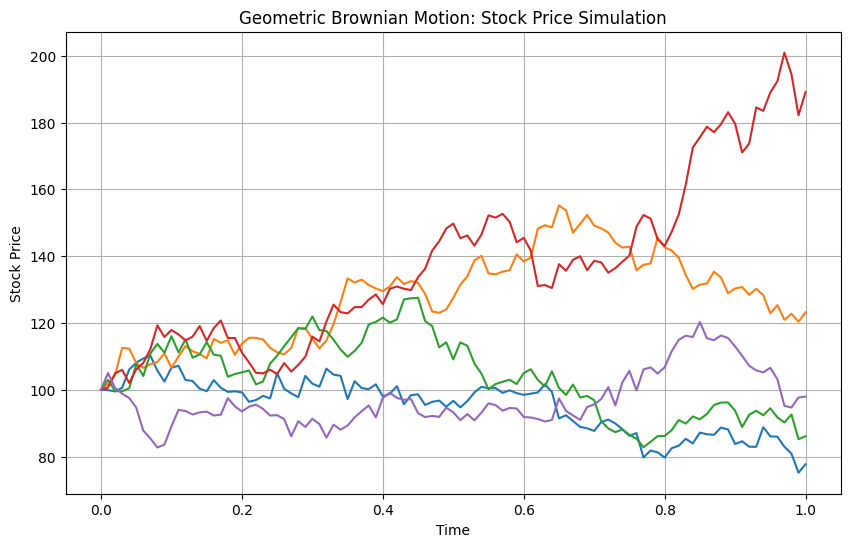

In [11]:
def geometric_brownian_motion(S0, mu, sigma, T, dt, num_paths):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps+1)
    paths = np.zeros((num_paths, num_steps+1))
    paths[:, 0] = S0  # initial stock price (at t=0)

    for i in range(num_paths):
        for j in range(1, num_steps+1):
            epsilon = np.random.normal(0, 1)
            drift = mu * paths[i, j-1] * dt
            diffusion = sigma * paths[i, j-1] * epsilon  * np.sqrt(dt)
            paths[i, j] = paths[i, j-1] + drift + diffusion

    return time, paths

# initial conditions
S0 = 100  # initial stock price
mu = 0.15  # 기대 수익률
sigma = 0.30  # volatility
T = 1  # time horizon (1 yr)
dt = 0.01  # time interval
num_paths = 5  # 시뮬레이션 경로 수

# stocks simulation
time, paths = geometric_brownian_motion(S0, mu, sigma, T, dt, num_paths)

# plot of geometric process
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(time, paths[i])

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion: Stock Price Simulation')
plt.grid(True)
plt.show()